# PROJECT OVERVIEW 


# STEP #1: MOUNT DRIVE AND IMPORT LIBRARIES/DATASETS

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [7]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [8]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [9]:
X_train.shape

(34799, 32, 32, 3)

In [10]:
y_train.shape

(34799,)

# STEP #2: IMAGES VISUALIZATION

13

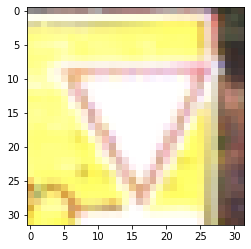

In [11]:
i = random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

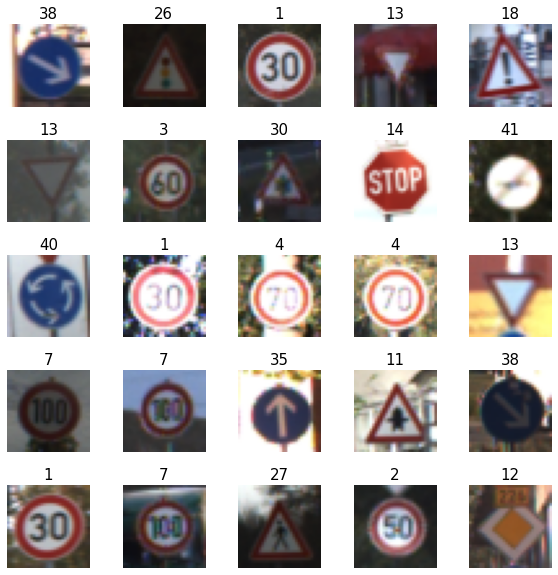

In [12]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

# STEP #3: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [15]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [16]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [17]:
X_train_gray.shape


(34799, 32, 32, 1)

In [18]:
X_test_gray.shape


(12630, 32, 32, 1)

In [19]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [20]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [21]:
X_train_gray_norm

array([[[[-0.41666667],
         [-0.36979167],
         [-0.34375   ],
         ...,
         [-0.69010417],
         [-0.69791667],
         [-0.73697917]],

        [[-0.45833333],
         [-0.4609375 ],
         [-0.45833333],
         ...,
         [-0.70052083],
         [-0.71875   ],
         [-0.7109375 ]],

        [[-0.46354167],
         [-0.48697917],
         [-0.52864583],
         ...,
         [-0.72135417],
         [-0.734375  ],
         [-0.72916667]],

        ...,

        [[-0.70572917],
         [-0.75260417],
         [-0.74479167],
         ...,
         [-0.80208333],
         [-0.80989583],
         [-0.82552083]],

        [[-0.7265625 ],
         [-0.671875  ],
         [-0.61979167],
         ...,
         [-0.70833333],
         [-0.77083333],
         [-0.84114583]],

        [[-0.73958333],
         [-0.56510417],
         [-0.67447917],
         ...,
         [-0.76041667],
         [-0.78645833],
         [-0.83333333]]],


       [[[-0.04427083],


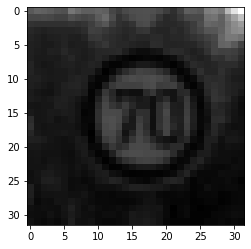

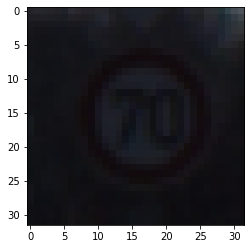

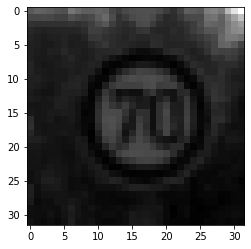

In [22]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# STEP#4: BUILD DEEP LEARNING MODEL

In [23]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())


CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
____

# STEP#5: COMPILE AND TRAIN DEEP LEARNING MODEL

In [24]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 nb_epoch = 15,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/15
34799/34799 [==============================] - 9s 251us/sample - loss: 3.1415 - acc: 0.1933 - val_loss: 2.5119 - val_acc: 0.3308
Epoch 2/15
34799/34799 [==============================] - 8s 239us/sample - loss: 1.5242 - acc: 0.5741 - val_loss: 1.3018 - val_acc: 0.6288
Epoch 3/15
34799/34799 [==============================] - 8s 237us/sample - loss: 0.8766 - acc: 0.7489 - val_loss: 0.9956 - val_acc: 0.6909
Epoch 4/15
34799/34799 [==============================] - 8s 238us/sample - loss: 0.6435 - acc: 0.8187 - val_loss: 0.8022 - val_acc: 0.7687
Epoch 5/15
34799/34799 [==============================] - 8s 243us/sample - loss: 0.5190 - acc: 0.8544 - val_loss: 0.7271 - val_acc: 0.7739
Epoch 6/15
34799/34799 [==============================] - 9s 249us/sample - loss: 0.4351 - acc: 0.8818 - val_loss: 0.6965 - val_acc: 0.7884
Epoch 7/15
34799/34799 [==============================] - 8s 240us/sample - loss: 0.3698 - acc: 0.9014 - val_lo

# STEP#6: ASSESS TRAINED MODEL PERFORMANCE 

In [26]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 2s 138us/sample - loss: 0.8985 - acc: 0.8458
Test Accuracy: 0.8457640409469604


In [27]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [30]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

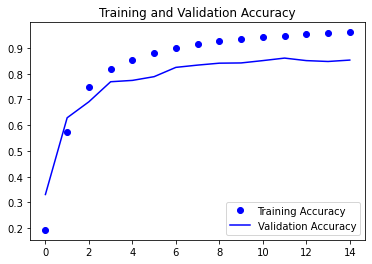

In [31]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

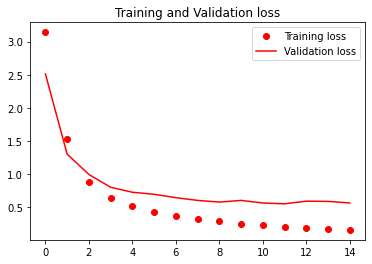

In [32]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [33]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

In [1]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_true, predicted_classes)
# plt.figure(figsize = (25, 25))
# sns.heatmap(cm, annot = True)

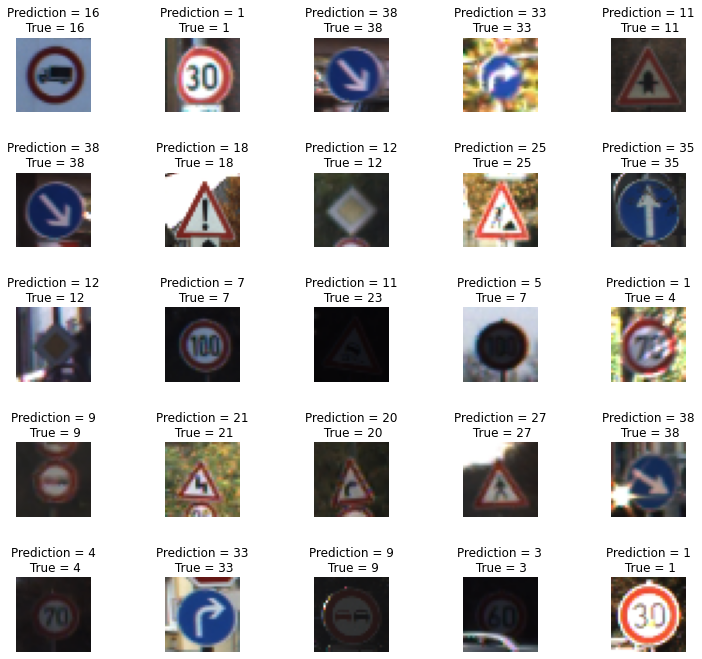

In [35]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [37]:
CNN.save('traffic.h5')

In [28]:
!pip install jupyterthemes